# Choropleth Maps

## Offline Plotly Usage

Get imports and set everything up to be working offline.

In [303]:
#import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, plot, iplot

## Choropleth Maps

In [304]:
import pandas as pd

In [305]:
data = {'type': 'choropleth',
        #'locations': ['AZ','CA','NY'],
        #'locations': ['Germany','France','Italy'],
        'locations': ['VNM'],
        #'locationmode': 'USA-states',
        #'locationmode': 'country names',
        'colorscale': 'Earth',
        'text': ['text1','text2','text3'],
        'z':[1.0,2.0,3.0],
        'colorbar': {'title':'Colorbar Title'}
       }

Then we create the layout nested dictionary:

In [306]:
#layout = {'geo': {'scope':'usa'}}
layout = {'geo': {'scope':'asia'}}

In [307]:
# Check https://plotly.com/python-api-reference/generated/plotly.graph_objects.Choropleth.html
# Check params of layout from go.Layout.geo https://plotly.com/python-api-reference/generated/plotly.graph_objects.Layout.html
choromap = go.Figure(data = [data],layout = layout)

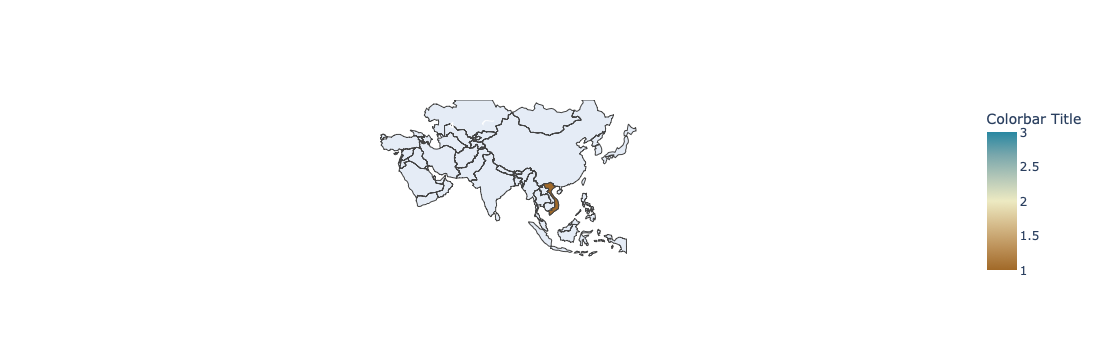

In [308]:
iplot(choromap)

### Real Data US Map Choropleth

Now let's show an example with some real data as well as some other options we can add to the dictionaries in data and layout.

In [309]:
df = pd.read_csv('2011_US_AGRI_Exports')
df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61,Alabama<br>Beef 34.4 Dairy 4.06<br>Fruits 25.1...
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00,Alaska<br>Beef 0.2 Dairy 0.19<br>Fruits 0.0 Ve...
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95,Arizona<br>Beef 71.3 Dairy 105.48<br>Fruits 60...
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44,Arkansas<br>Beef 53.2 Dairy 3.53<br>Fruits 6.8...
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95,California<br>Beef 228.7 Dairy 929.95<br>Frui...


Now out data dictionary with some extra marker and colorbar arguments:

In [310]:
data = dict(type='choropleth',
            colorscale = 'Blues',
            locations = df['code'],
            z = df['total exports'],
            locationmode = 'USA-states',
            text = df['text'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Millions USD"}
            ) 

And our layout dictionary with some more arguments:

In [311]:
layout = dict(title = '2011 US Agriculture Exports by State',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'black')
             )

In [312]:
choromap = go.Figure(data = [data],layout = layout)

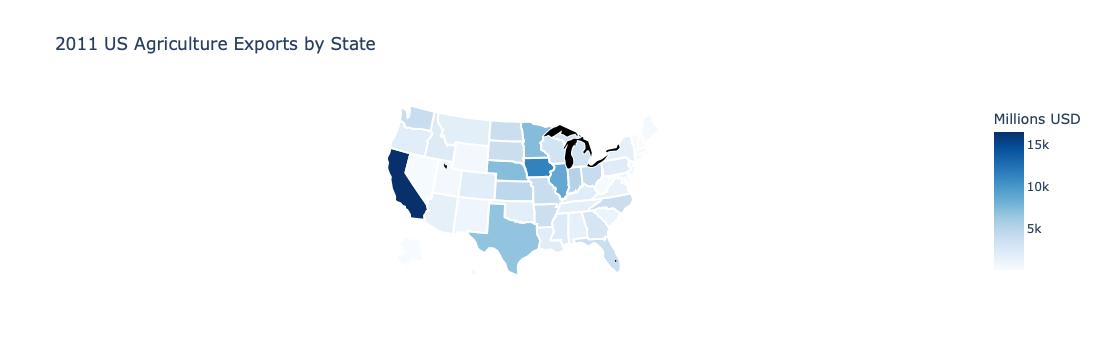

In [313]:
iplot(choromap)

# World Choropleth Map

Now let's see an example with a World Map:

In [314]:
df = pd.read_csv('2014_World_GDP')
df.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [315]:
data = dict(
        type = 'choropleth',
        locations = df['CODE'],
        z = df['GDP (BILLIONS)'],
        text = df['COUNTRY'],
        colorbar = {'title' : 'GDP Billions US'},
      ) 

In [316]:
layout = dict(
    title = '2014 Global GDP',
    geo = dict(
        showframe = False,
        projection = {'type':'stereographic'}
    )
)

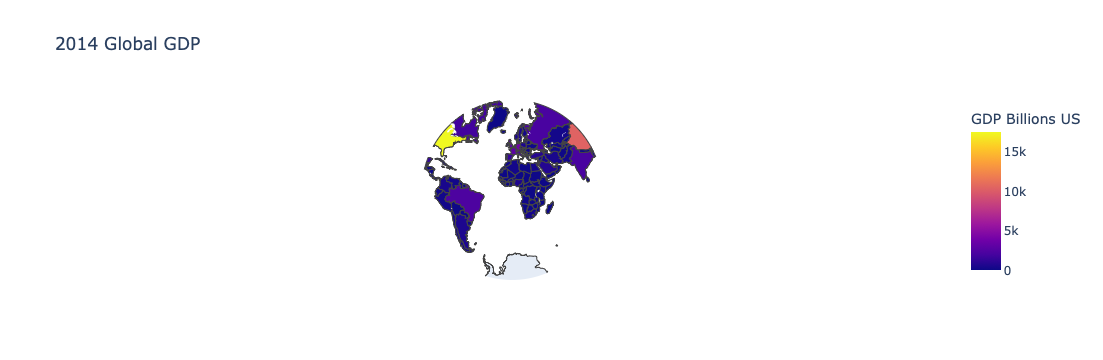

In [317]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

# Great Job!